In this notebook we will implement 2 layer network. 1st layer has three units and 2nd layer has one output unit.
Implementation will be through Python and Numpy

This notebook flows like   
1- Importing our required libraries  
2- Define our dataset( or you can load your own dataset)  
3- Visualize our dataset (using library matplotlib)  
4- Normalizing our data (Data Preprocessing)  
5- Defining our model  
    - Define activation function  
    - Define dense layer and its computation  
    - Define Sequential (final model) for our 2 layer network  
    - Define the predict function  
    - Define our weights ( in this case we have learned weights directly, we will later train our model)  
6- Testing  
    - Define our example for testing, one positive example and one negative example.  
     

In [89]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
# lets make our own dataset for the NN.
def load_coffee_data():
    """ Creates a coffee roasting data set.
        roasting duration: 12-15 minutes is best
        temperature range: 175-260C is best
    """
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1,2)
    X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
    X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
    Y = np.zeros(len(X))
    
    i=0
    for t,d in X:
        y = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1,1))

In [91]:
X_train, Y_train = load_coffee_data()

In [92]:
print(X_train.shape)
print(Y_train.shape)

(200, 2)
(200, 1)


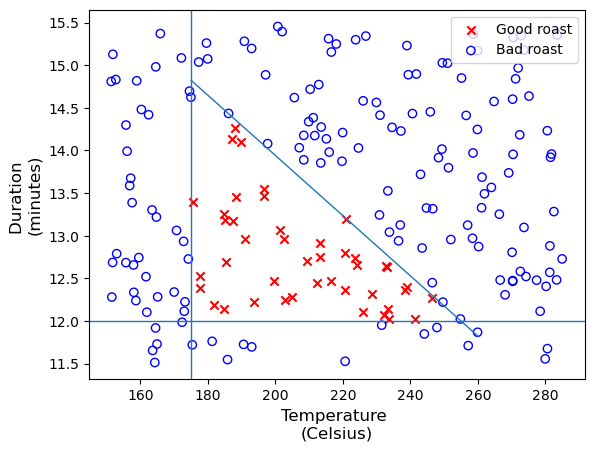

In [93]:
#lets plot our data
y= Y_train.reshape(-1,)
fig, ax = plt.subplots(1,1,)
ax.scatter(X_train[y==1,0], X_train[y==1,1], marker='x', color= 'r', label = 'Good roast')
ax.scatter(X_train[y==0,0], X_train[y==0,1], marker='o', color= 'b', label = 'Bad roast', linewidth=1, facecolors='None')
ax.set_xlabel("Temperature \n(Celsius)",size=12)
ax.set_ylabel("Duration \n(minutes)",size=12)
ax.legend(loc='upper right')


# one nice thing to do is drawing our own decision boundary, you can comment out this code to see directly our original plot
tr = np.linspace(175,260,50)
ax.plot(tr, (-3/85) * tr + 21, linewidth=1)
ax.axhline(y=12, linewidth=1)
ax.axvline(x=175, linewidth=1)

# lets show our plot
plt.show()


In [103]:
# lets define our normalization function to normalize our data
def normalization(X):
    m,n = X.shape
    mean = np.mean(X)
    max = np.max(X)
    min = np.min(X)
    for i in range(m):
        for j in range(n):
            X[i,j] = X[i,j]- mean/(max - min)
    return X
    

In [104]:
print(X_train.max())
x1 = normalization(X_train)
print(normalization(x1.max()))

284.99434167453603


ValueError: not enough values to unpack (expected 2, got 0)

In [95]:
# lets define our activation function
def Sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g
    

In [83]:
# lets define function to calculate layer calculation with fully connected network such as dense layer

def Dense(a_in, w, b):
    units = W.shape[1]
    # can also be implemented with units = a_in.shape[]
    a_out = np.zeros(m)
    for i in range(m):
        z= np.dot(W[:,i],a_in)+b[i]
        a_out[i] = Sigmoid(z)

    #VECTORIZED IMPLEMENTATION
    #X,W and B are numpy arrays
    #z= np.matmul(W,X)+B
    #a_out = sigmoid(z)
    return a_out
   


In [84]:
# finally lets define our two layer network
def Sequential( x, W1,b1, W2, b2):
    a_1 = Dense(x, W1, b1)
    a_2 = Dense(a_1, W2, b2)
    return a_2

In [85]:
#lets define our predict function
def Predict(x, W1, b1, W2, b2):
    m = X.shape[0]
    pred = np.zeros((m,1))
    for i in range(m):
        pred[i,0] = Sequential(x, W1, b1, W2, b2)
    return pred

 We introduced here learned weights for the network as we do not want to train the network for now. In other notebook we will
do back propagation of the network for its learn weights

In [86]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

**Testing Phase**  Let's test our 

In [ ]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")